In [11]:
import numpy as np
import pandas as pd

# Generar 500 datos aleatorios entre 0 y 1000
data = np.random.uniform(0, 1000, 500)

# Crear un DataFrame
df = pd.DataFrame(data, columns=['Datos'])

# Definir los intervalos
bins = np.linspace(0, 1000, num=11)  # 10 intervalos

# Calcular las frecuencias
frecuencias, _ = np.histogram(df['Datos'], bins=bins)

# Crear la tabla de frecuencia
tabla_frecuencia = pd.DataFrame({
    'Intervalo': [f"{bins[i]:.1f} - {bins[i+1]:.1f}" for i in range(len(bins)-1)],
    'Frecuencia': frecuencias
})

# Frecuencia acumulada
tabla_frecuencia['Frecuencia Acumulada'] = tabla_frecuencia['Frecuencia'].cumsum()

print("Setup terminado")
print(df)
print(tabla_frecuencia)

Setup terminado
          Datos
0     60.892226
1    885.796339
2    898.110969
3     55.981439
4    950.955860
..          ...
495  317.373748
496  598.192520
497  404.121554
498  116.867149
499  412.481488

[500 rows x 1 columns]
        Intervalo  Frecuencia  Frecuencia Acumulada
0     0.0 - 100.0          56                    56
1   100.0 - 200.0          46                   102
2   200.0 - 300.0          51                   153
3   300.0 - 400.0          51                   204
4   400.0 - 500.0          47                   251
5   500.0 - 600.0          52                   303
6   600.0 - 700.0          50                   353
7   700.0 - 800.0          55                   408
8   800.0 - 900.0          36                   444
9  900.0 - 1000.0          56                   500


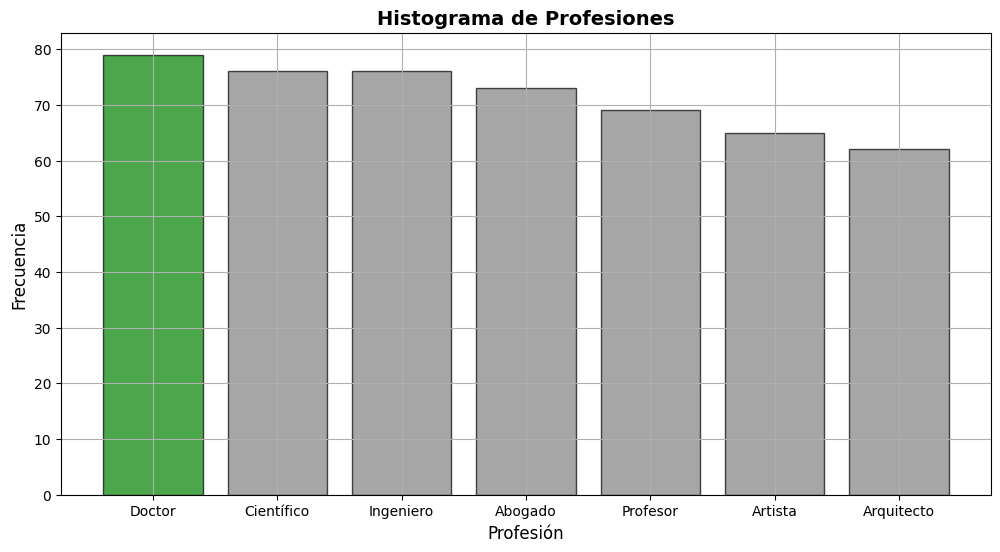

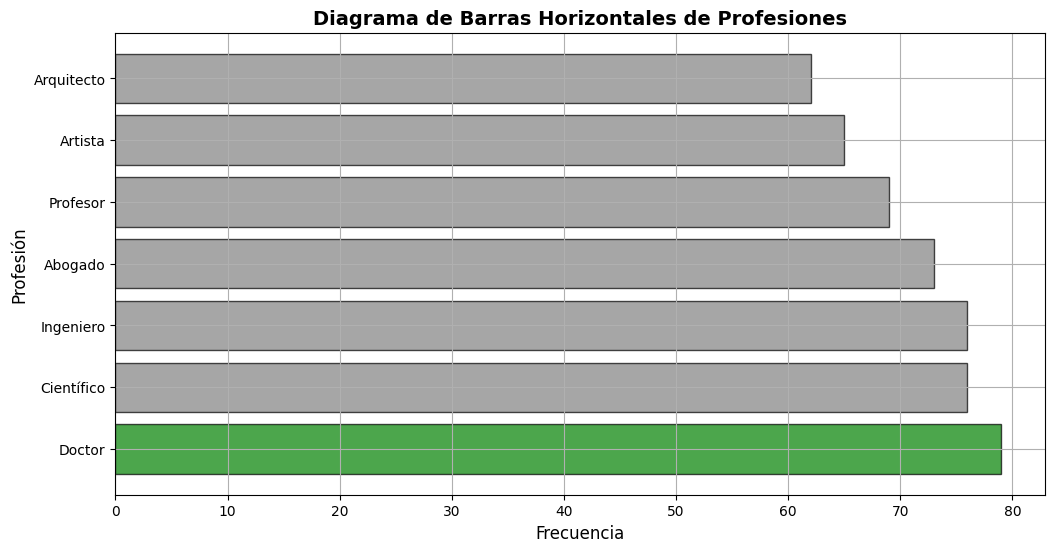

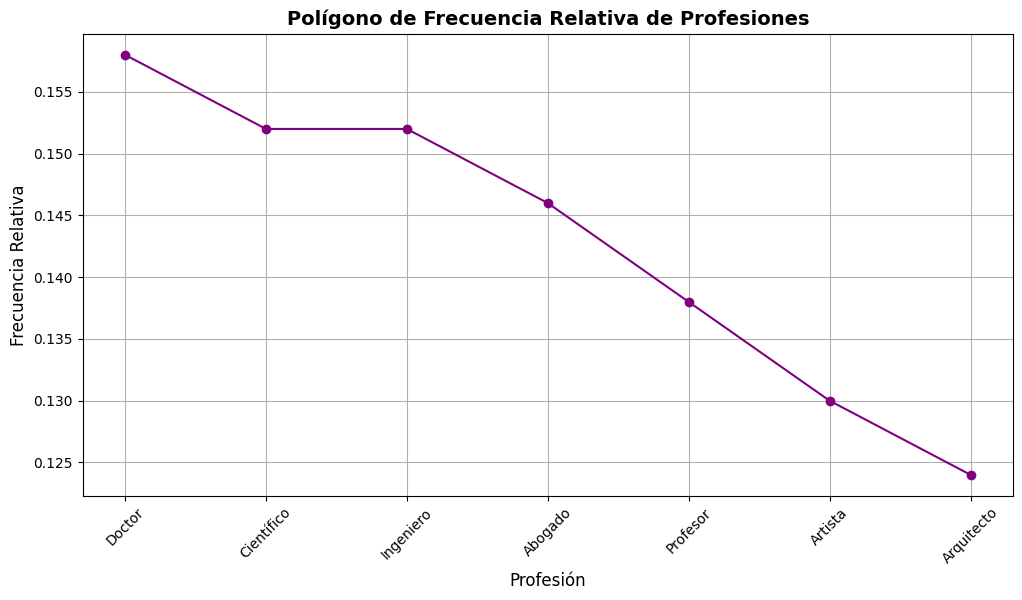

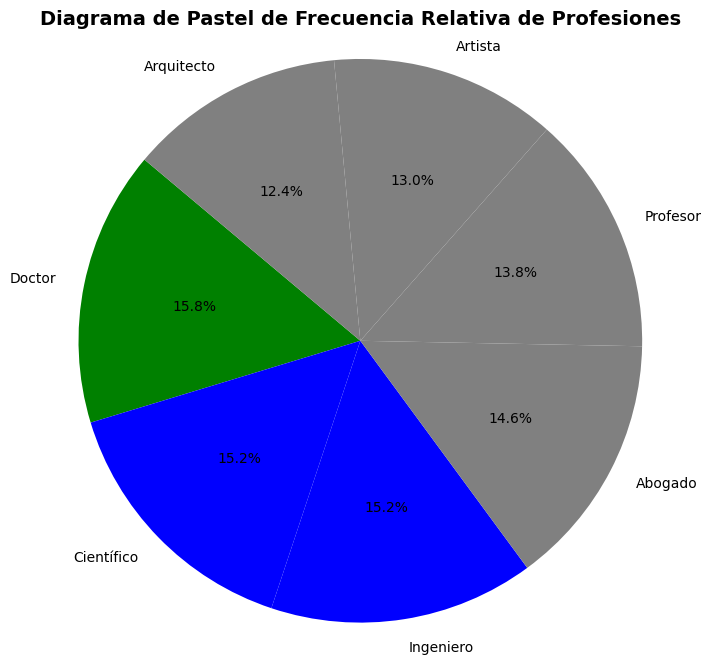

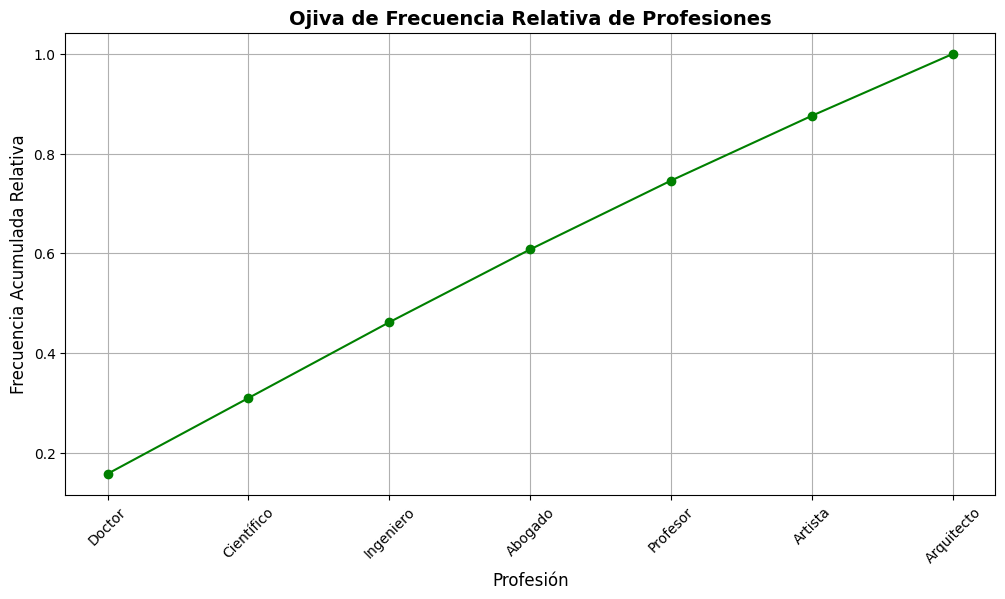

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración
np.random.seed(0)  # Para reproducibilidad

# Datos de ejemplo
paises = ['Argentina', 'Brasil', 'Chile', 'Colombia', 'México', 'Perú', 'Venezuela']
profesiones = ['Ingeniero', 'Doctor', 'Profesor', 'Abogado', 'Arquitecto', 'Científico', 'Artista']

# Generar 500 datos aleatorios
num_datos = 500
data = {
    'Pais': np.random.choice(paises, num_datos),
    'Salario': np.random.randint(20000, 120000, num_datos),  # Salarios entre 20,000 y 120,000
    'Personas': np.random.randint(1, 100, num_datos),  # Número de personas entre 1 y 100
    'Profesion': np.random.choice(profesiones, num_datos)
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Calcular la frecuencia de cada profesión
frecuencia_profesion = df['Profesion'].value_counts()

# Obtener las 7 profesiones con mayores frecuencias
top_profesiones = frecuencia_profesion.head(7)

# Asignar colores: el más alto en verde, los demás en gris
colors = ['green' if i == top_profesiones.max() else 'gray' for i in top_profesiones]

# 1. Gráfica de Frecuencia Absoluta - Histograma
plt.figure(figsize=(12, 6))
plt.bar(top_profesiones.index, top_profesiones.values, color=colors, edgecolor='black', alpha=0.7)
plt.title('Histograma de Profesiones', fontsize=14, fontweight='bold')
plt.xlabel('Profesión', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid()
plt.show()

# 2. Gráfica de Frecuencia Absoluta - Diagrama de Barras Horizontales
plt.figure(figsize=(12, 6))
plt.barh(top_profesiones.index, top_profesiones.values, color=colors, edgecolor='black', alpha=0.7)
plt.title('Diagrama de Barras Horizontales de Profesiones', fontsize=14, fontweight='bold')
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Profesión', fontsize=12)
plt.grid()
plt.show()

# 3. Calcular la frecuencia relativa
frecuencia_relativa = top_profesiones / num_datos

# 4. Gráfica del Polígono de Frecuencia
plt.figure(figsize=(12, 6))
plt.plot(top_profesiones.index, frecuencia_relativa, marker='o', color='purple', linestyle='-')
plt.title('Polígono de Frecuencia Relativa de Profesiones', fontsize=14, fontweight='bold')
plt.xlabel('Profesión', fontsize=12)
plt.ylabel('Frecuencia Relativa', fontsize=12)
plt.grid()
plt.xticks(rotation=45)  # Para que las etiquetas de las profesiones sean legibles
plt.show()

# 5. Gráfica del Diagrama de Pastel de Frecuencia Relativa
# Ordenar por frecuencia relativa
frecuencia_relativa = frecuencia_relativa.sort_values(ascending=False)

# Asignar colores: el mayor en verde, los siguientes dos en azul, los demás en gris
colors = ['green'] + ['blue'] * 2 + ['gray'] * (len(frecuencia_relativa) - 3)

plt.figure(figsize=(8, 8))
plt.pie(
    frecuencia_relativa,
    labels=frecuencia_relativa.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title('Diagrama de Pastel de Frecuencia Relativa de Profesiones', fontsize=14, fontweight='bold')
plt.axis('equal')  # Para que el pastel sea circular
plt.show()

# 6. Gráfica de Ojiva de Frecuencia Relativa
# Calcular la frecuencia acumulada relativa
frecuencia_acumulada = frecuencia_relativa.cumsum()

# Gráfica de Ojiva de Frecuencia Relativa
plt.figure(figsize=(12, 6))
plt.plot(top_profesiones.index, frecuencia_acumulada, marker='o', color='green', linestyle='-')
plt.title('Ojiva de Frecuencia Relativa de Profesiones', fontsize=14, fontweight='bold')
plt.xlabel('Profesión', fontsize=12)
plt.ylabel('Frecuencia Acumulada Relativa', fontsize=12)
plt.grid()
plt.xticks(rotation=45)  # Para que las etiquetas de las profesiones sean legibles
plt.show()